<a href="https://colab.research.google.com/github/robyng15/Boolean-Models/blob/master/Boolean_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

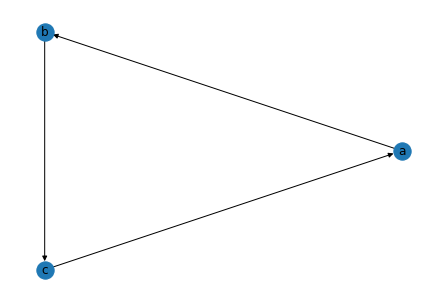

In [0]:
import matplotlib.pyplot as plt
import networkx as nx

# Create list to specify 'edges'
edges = [('a','b'),
         ('b','c'),
         ('c','a')]

# Variable to hold network
G = nx.DiGraph(edges)

# Visualize network
nx.draw_circular(G,with_labels=True)
plt.savefig('example_graph_drawing.png')

/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


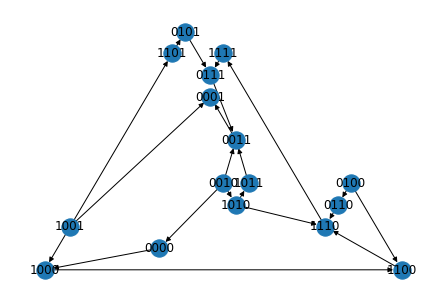

In [0]:
edges = [('0000','1000'),
         ('0000', '0000'),
         ('1000', '1000'),
         ('1000', '1100'),
         ('1100', '1100'),
         ('1100', '1110'),
         ('1110', '1111'),
         ('1111', '0111'),
         ('0111', '0011'),
         ('0011', '0001'),
         ('0010', '1010'),
         ('0010', '0000'),
         ('0010', '0011'),
         ('1010', '1110'),
         ('1010', '1011'),
         ('1011', '0011'),
         ('0110', '1110'),
         ('0100', '1100'),
         ('0100', '0110'),
         ('1101', '0101'),
         ('0101', '0111'),
         ('1001', '0001'),
         ('1001', '1101'),
         ('1001', '1000')]

G = nx.DiGraph(edges)
nx.draw_planar(G,with_labels=True)
plt.savefig('fifth_problem_graph_drawing.png')
        

In [1]:
file = open('figure-1-v-model.txt')
lines = file.readlines()
new_list = []
rules = []
gene_with_rule = list()

#print(lines)

def create_list_gene_with_rule(locallines):
  length = len(locallines)
  keywds = ['or','and','not']
  gene_with_rule = []
  for i in range(length - 1):
    #print(lines[i+1])
    l = lines[i+1].strip('\n')
    gene_with_rule.append(l.split('\t'))
    #print(l)
#     gene_with_rule.append(l.split('\t'))
#     #print(gene_with_rule[i])
#     gene_with_rule[i][1] = gene_with_rule[i][1].replace(')', '')
#     gene_with_rule[i][1] = gene_with_rule[i][1].replace('(', '')
#     gene_with_rule[i][1] = gene_with_rule[i][1].replace(' ', '')
#     gene_with_rule[i][1] = gene_with_rule[i][1].replace('\n', '')
#   allkeywds = list(keywds)
#   allkeywds.extend([gene_with_rule[k][0] for k in range(length-1)])
#   #print(allkeywds)
#   lengthkeywds = len(allkeywds)
#   for j in range(length -1):
#     for k in range(lengthkeywds):
#       if allkeywds[k] in gene_with_rule[j][1][0:len(gene_with_rule[j][1])-1]:
#         gene_with_rule[j][1] = gene_with_rule[j][1].replace(allkeywds[k], allkeywds[k] + ',')
  return gene_with_rule

print(create_list_gene_with_rule(lines))


[['a', 'not ( d )'], ['b', '( a )'], ['c', '( b )'], ['d', '( c or d )']]


In [2]:
# Loop to remove unnecessary info and creates a new list = (gene, rule)
for line in lines:
  line = line.strip()
  line = line.split('\t')
  if line[1] != 'Rule':
    rules.append(line[1])
  #print(line[1].split(' '))
  for token in line[1].split(' '):
      if token != 'not' and token != '(' and token != ')' and token!= 'or' and token != "Rule":
        new_list.append((line[0],token))
#print(new_list)

proteins = [item[0] for item in create_list_gene_with_rule(lines)]
print(proteins)
#print(rules)

['a', 'b', 'c', 'd']


In [3]:
# Function to return formula depending on protein_id
def get_formula(protein_id, lines):
  #for i,rule in enumerate(create_list_gene_with_rule(list(lines))):
  for rule in create_list_gene_with_rule(list(lines)):
    if protein_id == rule[0]:
      #return(rule[1],i)
      return(rule[1])
print(get_formula('a',list(lines)))
#print(create_list_gene_with_rule(list(lines)))

not ( d )


In [4]:
# Function to determine protein state based on the rule for the system 
def compute_protein_state(formula, net_state, proteins): 
  boolspace = {}
  for p, s in zip(proteins, net_state):
    eval_Str = p + ' = ' + str(s)
    exec(eval_Str, boolspace)
  t = 'out = ' + formula
  exec(t, boolspace)
  out = int(boolspace['out'])
  return out

print(compute_protein_state(get_formula('a',list(lines)),[0,0,0,0],proteins))
#print(compute_protein_state('(,[0,0,0,0,0,1,0,0,0,0],proteins))
#   # Loop to return value based on formula
#   #print(formula)
#   tokens = formula.split(',')
#   print(tokens)
#   if 'not' in tokens:
#     activator_flag = False
#     #activator_state = 0
#     inhibitor_state = 0
#     for j in range(0, len(tokens)):
#       # all prot before not are activators, after not are inhibitors
#       #if tokens.index(tokens[j]) < tokens.index('not'):
#       for k in range(0, len(create_list_gene_with_rule(lines))):
#         if tokens.index(tokens[j]) < tokens.index('not'):
#           if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
#             activator_state = 0
#             activator_flag = True
#             #print(activator_flag)
#             state = net_state[k]
#             if state == 1:
#               activator_state = 1
#             if state == 0:
#               activator_state = 0
#         if j > tokens.index('not'):
#           #print(tokens.index('not'))
#           if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
#             state = net_state[k]
#             if state == 1:
#               inhibitor_state = 0
#             if state == 0:
#               inhibitor_state = 1
#               #print(inhibitor_state)
#               #print(activator_flag, activator_state, inhibitor_state)
#               break
#     if activator_flag == True:
#       if activator_state == 1 and inhibitor_state == 1: 
#         return 1
#       else:
#         return 0
#     else:   # activator_flag == False
#       for k in range(0,len(create_list_gene_with_rule(lines))):
#         if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
#             state = net_state[k]
#             #print(state)
#             if state == 1:
#               inhibitor_state = 0
#               #print(activator_flag, inhibitor_state)
#               #print(tokens[j], state)
#             if state == 0:
#               inhibitor_state = 1
#               break
#       if inhibitor_state == 0:
#         return 0
#       else:
#         return 1
     
#   elif 'or' in tokens:
#     for j in range(0, len(tokens)):
#       for k in range(0, len(create_list_gene_with_rule(lines))):
#         if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
#           state = net_state[k]
#           if state == 1:
#             return 1
#     return 0
#   elif '' in tokens:
#     for j in range(0, len(tokens)):
#       for k in range(0, len(create_list_gene_with_rule(lines))):
#        #print(create_list_gene_with_rule(lines)[k][0])
#         if tokens[j] == '':
#           return net_state[k]
#   else:
#     for j in range(0, len(tokens)):
#       for k in range(0, len(create_list_gene_with_rule(lines))):
#         if tokens[j] == (create_list_gene_with_rule(lines))[k][0]:
#           state = net_state[k]
#           if state == 1:
#             return 1
#           elif state == 0:
#             return 0
# print(compute_protein_state(get_formula('a', lines), [0,0,0]))

1


In [0]:
# Function to determine protein state synchronously
def compute_next_protein_state_synchronous(gene_with_rule, net_state, lines):
  next_state_list = list(net_state)
  #print(len(gene_with_rule))
  for i in range(len(gene_with_rule)):
    formula = get_formula(gene_with_rule[i][0],lines)
    new_state_value = compute_protein_state(formula, net_state, proteins)
    next_state_list[i] = new_state_value
  #print(new_state_value)
  return next_state_list
print(compute_next_protein_state_synchronous(create_list_gene_with_rule(lines), [0,0,0,0,0,0,0,0,0,0], lines))

[0, 1, 1, 0, 0, 1, 0, 1, 1, 1]


In [5]:
# Function to determine the protein state asynchronously
def compute_next_protein_state_asynchronous(gene_with_rule, net_state, lines):  
  next_state_list = list()
  #print(proteins)
  #for prot in proteins:
  #  next_state_list.append([prot, net_state])
  for gwr in gene_with_rule:
    next_state_list.append([gwr[0], list(net_state)])
  #print(next_state_list)
  for i in range(0, len(next_state_list)):
    next_state_list[i][1][i] = compute_protein_state(gene_with_rule[i][1], list(net_state), proteins)
  return next_state_list
print(compute_next_protein_state_asynchronous(create_list_gene_with_rule(lines), [0,0,0,0], lines))

[['a', [1, 0, 0, 0]], ['b', [0, 0, 0, 0]], ['c', [0, 0, 0, 0]], ['d', [0, 0, 0, 0]]]


In [0]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

def compute_state_space_network_synchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_synchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    edgelist.append((start_state, next_state_space))
    #print(next_state_space[0][1])
    #print(edgelist)

  return edgelist


#if next_state_space[k][1] not in edgelist:
#  edgelist.append((start_state, next_state_space[k][1]))

output = compute_state_space_network_synchronous(create_list_gene_with_rule(lines), [1,0,0])
print(output)

[([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 0, 1, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 1, 0, 0, 1, 0, 1, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 0, 0, 1, 0, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 1, 1, 0, 0, 1, 0, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]), ([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]), ([0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0]), ([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]), ([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0]), ([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 0, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]), ([0, 0, 0

[['000'], ['111'], ['011', '101', '110'], ['100', '010', '001']]


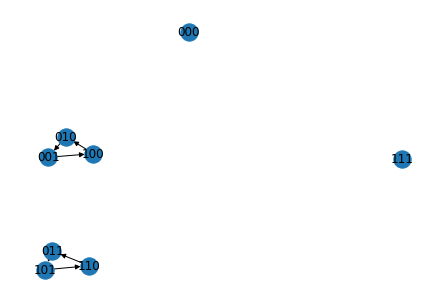

In [0]:
edgelist = []
for seq in output:
  sequence = seq
  edgelist.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
G = nx.DiGraph(edgelist)
print(list(nx.simple_cycles(G)))
#print(nx.cycle_basis(G,0))
#if the edge of the graph is a self-loop --> steady state
nx.draw_spring(G, with_labels=True)
  
#print(edgelist)
plt.savefig('state_space_network_synchronous_model-ii.png')

In [0]:
import itertools
import networkx as nx
def compute_state_space_network_asynchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_asynchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    #print(next_state_space[0][1])
    #print(edgelist)
    for k in range(len(next_state_space)):
      if next_state_space[k][1] not in edgelist:
        edgelist.append((start_state, next_state_space[k][1]))
      #if edgelist.count(next_state_space) > 1: 
  return edgelist

output_a = compute_state_space_network_asynchronous(create_list_gene_with_rule(lines), [0,0,0,0])
#print(output_a)

In [57]:
edgelist_a = []
for seq in output_a:
  sequence = seq
  edgelist_a.extend([(''.join([str(st) for st in sequence[i]]),
             ''.join([str(st) for st in sequence[i+1]])) for i in range(len(sequence)-1)])
  
print(edgelist_a)
G_a = nx.DiGraph(edgelist_a)
#nodes = G_a.nodes()
#print(nodes)
#cycle_a = (list(nx.simple_cycles(G_a)))
#print(cycle_a)
    
    
# self-loop
#self_loop = list(nx.nodes_with_selfloops(G_a))
#self_loop_edges = list(nx.selfloop_edges(G_a))
#print(self_loop_edges)
#print(self_loop)

#nx.draw_circular(G_a, node_color='blue', with_labels=True)
#plt.savefig('state_space_network_asynchronous_dyn-cycle.png')

[('0000', '1000'), ('0000', '0000'), ('0000', '0000'), ('0000', '0000'), ('0001', '0001'), ('0001', '0001'), ('0001', '0001'), ('0001', '0001'), ('0010', '1010'), ('0010', '0010'), ('0010', '0000'), ('0010', '0011'), ('0011', '0011'), ('0011', '0011'), ('0011', '0001'), ('0011', '0011'), ('0100', '1100'), ('0100', '0000'), ('0100', '0110'), ('0100', '0100'), ('0101', '0101'), ('0101', '0001'), ('0101', '0111'), ('0101', '0101'), ('0110', '1110'), ('0110', '0010'), ('0110', '0110'), ('0110', '0111'), ('0111', '0111'), ('0111', '0011'), ('0111', '0111'), ('0111', '0111'), ('1000', '1000'), ('1000', '1100'), ('1000', '1000'), ('1000', '1000'), ('1001', '0001'), ('1001', '1101'), ('1001', '1001'), ('1001', '1001'), ('1010', '1010'), ('1010', '1110'), ('1010', '1000'), ('1010', '1011'), ('1011', '0011'), ('1011', '1111'), ('1011', '1001'), ('1011', '1011'), ('1100', '1100'), ('1100', '1100'), ('1100', '1110'), ('1100', '1100'), ('1101', '0101'), ('1101', '1101'), ('1101', '1111'), ('1101', 

In [20]:
def find_limit_cycle(G_a):
  limit_cycle = list()
  cycle = list(nx.simple_cycles(G_a))
  return cycle

print(find_limit_cycle(G_a))

[['0000'], ['1000'], ['1100'], ['0001'], ['0010'], ['1010'], ['0011'], ['1110'], ['1011'], ['0100'], ['0110'], ['0111'], ['0101'], ['1111'], ['1001'], ['1101']]


In [23]:
def find_longer_list(G_a):
  limit_cycle = find_limit_cycle(G_a)
  long_limit_cycle = list()
  for i in limit_cycle:
    if len(i) != 1:
      long_limit_cycle.append(i)
      return long_limit_cycle
  edgelist_loop = []
  for seq in long_limit_cycle:
    sequence = seq
    edgelist_loop.append((''.join([str(st) for st in seq[0]]),
                          ''.join([str(st) for st in seq[1]])))
    G_loop = nx.DiGraph(edgelist_loop)
    nx.draw_spring(G_loop, with_labels=True)

print(find_longer_list(G_a))

None


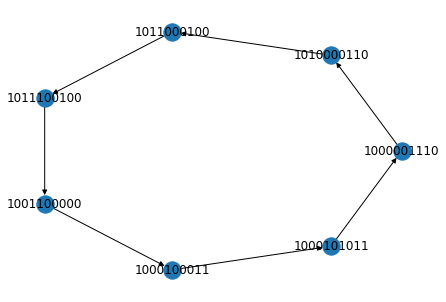

In [0]:
# Mammalian
loop = find_longer_list(G)
#print(loop)
edgelist_loop = []
for seq in loop:
  sequence = seq
  edgelist_loop.extend([(''.join([str(st) for st in sequence[i]]),
                      ''.join([str(st) for st in sequence[i+1]])) for i in range(len(sequence)-1)])
edgelist_loop.extend([
    (''.join([str(st) for st in loop[0][-1]]),
    ''.join([str(st) for st in loop[0][0]])
    )])
G_loop = nx.DiGraph(edgelist_loop)
nx.draw_circular(G_loop, with_labels=True)

In [25]:
def find_self_cycle(G_a):
  self_cycle = list()
  G = nx.DiGraph(edgelist_a)
  self_loop_edges = list(nx.selfloop_edges(G))
  state = [node[0] for node in self_loop_edges]
  return state

print(find_self_cycle(edgelist_a))

['0000', '1000', '0001', '0010', '1010', '0011', '0100', '1100', '0110', '0101', '0111', '1110', '1001', '1101', '1011', '1111']


In [26]:
# Creates a list of all nodes that are not steady states and removes duplicates
def find_not_steady_states(G_a):
  not_steady_state = list()
  self_cycle = find_self_cycle(G_a)
  long_limit_cycle = find_longer_list(G_a)
  #print(len(edgelist_a))
  #print(len(self_cycle))
  for i in range(len(edgelist_a)):
    for j in range(len(self_cycle)):
      if self_cycle[j] == edgelist_a[i][0] and self_cycle[j] != edgelist_a[i][1]:
        if self_cycle[j] not in not_steady_state:
          not_steady_state.append(self_cycle[j])
  return not_steady_state
print(find_not_steady_states(G_a))

# Remove the states that are not steady states from a list that contains all the possible nodes
def find_steady_states(G_a):
  steady_states = list()
  self_cycle = find_self_cycle(G_a)
  not_steady_state = find_not_steady_states(G_a)
  steady_states = [x for x in self_cycle if x not in not_steady_state]
  return steady_states
print(find_steady_states(G_a))  

['0000', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
['0001']


In [150]:
# Graphspace Asynchronous
def graphspace_asynchronous(edgelist_a, G):
  nodes = G_a.nodes()
  edges = G_a.edges()
  limit_cycle = find_longer_list(G_a)
  steady_states = find_steady_states(G_a)
  edges_count = count_edges(G_a)
  #print(edges_count)
  #print(len(edges_count.keys()))
  scaled_edges = max_count_edges(G_a)
  #print(scaled_edges)
  #print(len(scaled_edges.keys()))
  nodes_count = count_nodes(G_a)
  scaled_nodes = max_count_nodes(G_a)
  #print(len(scaled_nodes.keys()))
  
  file_name = open('figure-1-model-v_asynchronous.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\", 'opacity': '%s'}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\", 'opacity': '%s'}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s', \"width\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for i in range(0, len(edgelist_a)):
    if limit_cycle != None:
      if edgelist_a[i][0] in limit_cycle:
        edge_color = 'blue'
      else:
        edge_color = 'grey'
    
    if edgelist_a[i][0] in steady_states:
      shape1 = 'rectangle'
      color1 = 'red'
      edge_color = 'grey'
    else:
      shape1 = 'ellipse'
      color1 = 'grey'
      edge_color = 'grey'
    
    if edgelist_a[i][1] in steady_states:
      shape2 = 'rectangle'
      color2 = 'red'
    else:
      shape2 = 'ellipse'
      color2 = 'grey'
      
    if edgelist_a[i] in scaled_edges.keys():
      if scaled_edges[edgelist_a[i]] == 0.0:
        edge_width = 1.0
      else:
        edge_width = scaled_edges[edgelist_a[i]]
      
    if edgelist_a[i][0] in scaled_nodes.keys():
      if scaled_nodes[edgelist_a[i][0]] == 0.0:
        opacity1 = 0.25
      else:
        opacity1 = scaled_nodes[edgelist_a[i][0]]

    if edgelist_a[i][1] in scaled_nodes.keys():
      if scaled_nodes[edgelist_a[i][1]] == 0.0:
        opacity2 = 0.25
      else:
        opacity2 = scaled_nodes[edgelist_a[i][1]]

        
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist_a[i][0], edgelist_a[i][1], edgelist_a[i][0], edgelist_a[i][1]))
    file_name.write(style % (shape1, color1, opacity1, edgelist_a[i][0], shape2, color2, opacity2, edgelist_a[i][1], 
                             edge_color, edge_width, edgelist_a[i][0], edgelist_a[i][1]))
    
  file_name.close()   
print(graphspace_asynchronous(edgelist_a, G_a))

None


In [151]:
file_name = open('figure-1-model-v_asynchronous.txt', 'r+')
print(file_name.read())

head	tail	head_label	tail_label	edge_popup	style
0000	1000	0000	1000	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '0.25'}, "id": '0000'},"tail": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '0.7142857142857142'}, "id": '1000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey', "width": '2.727272727272727'}, "id": '0000-1000'}}
0000	0000	0000	0000	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '0.25'}, "id": '0000'},"tail": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '0.25'}, "id": '0000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey', "width": '1.0'}, "id": '0000-0000'}}
0000	0000	0000	0000	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '0.25'}, "id": '0000'},"tail": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '0.25'}, "id": '0000'},"edge"

In [0]:
# Graphspace Synchronous
def graphspace_synchronous(edgelist, G):
  nodes = G.nodes()
  edges = G.edges()
  limit_cycle = find_longer_list(nodes)
  steady_states = find_steady_states(nodes)
  #random_walk = individual_random_walk(nodes)
  edges_count = count_edges(G)
  scaled_edges = max_count_edges(G)
  nodes_count = count_nodes(G)
  scaled_nodes = max_count_nodes(G)
  
  file_name = open('figure-1-model-ii_synchronous.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\", 'opacity': '%s'}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\", 'opacity': '%s'}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s', \"width\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for i in range(0, len(edgelist)):
    #if edgelist_a[i][0] in limit_cycle:
      #edge_color = 'blue'
    #else:
      #edge_color = 'grey'
    
    if edgelist[i][0] in steady_states:
      shape1 = 'rectangle'
      color1 = 'red'
      edge_color = 'grey'
    else:
      shape1 = 'ellipse'
      color1 = 'grey'
      edge_color = 'grey'
    
    if edgelist[i][1] in steady_states:
      shape2 = 'rectangle'
      color2 = 'red'
    else:
      shape2 = 'ellipse'
      color2 = 'grey'   
      
    if edgelist[i] in scaled_edges.keys():
      if scaled_edges[edgelist[i]] == 0.0:
        edge_width = 1.0
      else:
        edge_width = scaled_edges[edgelist[i]]
      
    if edgelist[i][0] in scaled_nodes.keys():
      if scaled_nodes[edgelist[i][0]] == 0.0:
        opacity1 = 0.25
      else:
        opacity1 = scaled_nodes[edgelist[i][0]]

    if edgelist[i][1] in scaled_nodes.keys():
      if scaled_nodes[edgelist[i][1]] == 0.0:
        opacity2 = 0.25
      else:
        opacity2 = scaled_nodes[edgelist[i][1]]
     
      
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist[i][0], edgelist[i][1], edgelist[i][0], edgelist[i][1]))
    file_name.write(style % (shape1, color1, opacity1, edgelist[i][0], shape2, color2, opacity2, edgelist[i][1], 
                             edge_color, edge_width, edgelist[i][0], edgelist[i][1]))
    
  file_name.close()   
print(graphspace_synchronous(edgelist, G))

None


In [0]:
file_name = open('figure-1-model-ii_synchronous.txt', 'r+')
print(file_name.read())

head	tail	head_label	tail_label	edge_popup	style
000	000	000	000	-	{"head": {'spec': {'shape': 'rectangle','color': 'red','border': "black", 'opacity': '0.01'}, "id": '000'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black", 'opacity': '0.01'}, "id": '000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey', "width": '0'}, "id": '000-000'}}
001	100	001	100	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '10.0'}, "id": '001'},"tail": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '9.200000000000001'}, "id": '100'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey', "width": '8.51063829787234'}, "id": '001-100'}}
010	001	010	001	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '9.6'}, "id": '010'},"tail": {'spec': {'shape': 'ellipse','color': 'grey','border': "black", 'opacity': '10.0'}, "id": '001'},"edge": {'spec': {"target-arrow

In [13]:
# Random walk async
import random

def individual_random_walk(G_a):
  nodes = list(G_a.nodes())
  #print(nodes)
  count = 0
  path = []
  random_path = []
  steady_states = list(find_steady_states(G_a))
  #print(steady_states)
  path = random.choice(nodes)
  #print(path)
  #G = nx.DiGraph(edgelist_a)
  while path not in steady_states and count < (2*len(nodes)):  
    #print(path)
    path_index = []
    for i in range(len(edgelist_a)):
      if path == edgelist_a[i][0]:
        path_index.append(edgelist_a[i][1])
    #print(path_index)
    next_edge = random.choice(path_index)
    random_path.append([path, next_edge])
    path = str(next_edge)
    count += 1
  return random_path
  
print(individual_random_walk(G_a))

[['0000', '0000'], ['0000', '1000'], ['1000', '1100'], ['1100', '1100'], ['1100', '1100'], ['1100', '1110'], ['1110', '1110'], ['1110', '1110'], ['1110', '1110'], ['1110', '1111'], ['1111', '0111'], ['0111', '0111'], ['0111', '0111'], ['0111', '0011'], ['0011', '0011'], ['0011', '0011'], ['0011', '0001']]


In [0]:
# Random walk sync
import random

def individual_random_walk(G):
  nodes = list(G.nodes())
  #print(nodes)
  count = 0
  path = []
  random_path = []
  steady_states = list(find_steady_states(nodes))
  path = random.choice(nodes)
  #print(path)
  G = nx.DiGraph(edgelist)
  while path not in steady_states and count < (2*len(nodes)):  
    #print(path)
    path_index = []
    for i in range(len(edgelist)):
      if path == edgelist[i][0]:
        path_index.append(edgelist[i][1])
    #print(path_index)
    next_edge = random.choice(path_index)
    random_path.append([path, next_edge])
    path = str(next_edge)
    count += 1
    #if len(steady_states) == 0:
    #if path not in steady_states and count == 50:
      #break
  #print(len(random_path))
  return random_path
#print(type(G))  
print(individual_random_walk(G))

[['100', '010'], ['010', '001'], ['001', '100'], ['100', '010'], ['010', '001'], ['001', '100'], ['100', '010'], ['010', '001'], ['001', '100'], ['100', '010'], ['010', '001'], ['001', '100'], ['100', '010'], ['010', '001'], ['001', '100'], ['100', '010']]


In [0]:
def simulate(G):
  nodes = list(G.nodes())
  steady_states = list(find_steady_states(nodes))
  nodes_used = []
  random_path = []
  path_index = []
  count = 0
  for i in range(len(nodes)):
    start_node = random.choice(nodes)
    nodes_used.append(start_node)
    while nodes[i] not in nodes_used and start_node not in steady_states and count < 100:
      for j in range(len(edgelist_a)):
        if start_node == edgelist_a[j][0]:
          path_index.append(edgelist_a[j][1])
      next_edge = random.choice(path_index)
      random_path.append([start_node, next_edge])
      path = str(next_edge)
      count += 1
    return random_path

  
#for i in range(len(nodes)):
  #if nodes[i] != random_walk[0]:
    #continue random_walk
    
print(simulate(G))  

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


KeyboardInterrupt: ignored

In [129]:
from collections import Counter

def count_nodes(G_a):
  nodes = list(G_a.nodes())
  node_walk_list = []
  self_nodes = []
  for i in range(2*len(nodes)):
    random_walk = individual_random_walk(G_a)
    rw = list(random_walk)
    random_walk = [(e[0],e[1]) for e in rw]  
  #print(random_walk)
    #count_node = [0 for i in range(len(random_walk))]
  #print(count_node)
    for j in range(len(random_walk)):
      if random_walk[j][0] == random_walk[j][1]:
        self_nodes.append(random_walk[j][0])
      else:
        node_walk_list.append(random_walk[j][1])
  return Counter(node_walk_list)

print(count_nodes(G_a))

Counter({'0001': 27, '0011': 21, '0111': 18, '1111': 11, '1110': 8, '1000': 3, '1100': 3, '0101': 2, '0000': 1, '1010': 1, '1011': 1, '1001': 1})


In [130]:
def max_count_nodes(G_a):
  nodes = list(G_a.nodes())
  nodes_count = count_nodes(G_a)
  max_opacity = max(nodes_count.values())
  #print(max_opacity)
  #print(max(nodes_count.keys()))
  scaled_counts = {}
  for i in range(len(nodes)):
    value = (nodes_count[nodes[i]]) / (max_opacity) * 10
    scaled_counts[nodes[i]] = value
  
  return scaled_counts
print(max_count_nodes(G_a))

{'0000': 0.6666666666666666, '1000': 2.0, '0001': 10.0, '0010': 0.0, '1010': 0.3333333333333333, '0011': 8.333333333333334, '0100': 0.0, '1100': 2.6666666666666665, '0110': 0.0, '0101': 0.6666666666666666, '0111': 6.0, '1110': 3.6666666666666665, '1001': 0.6666666666666666, '1101': 0.3333333333333333, '1011': 0.3333333333333333, '1111': 4.666666666666667}


Counter({'100': 54, '010': 53, '001': 53, '101': 22, '110': 21, '011': 21})


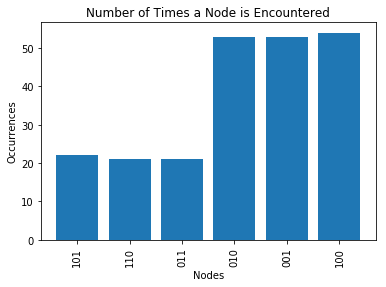

None


In [0]:
import numpy as np
import matplotlib.pyplot as plt

def plot_count_nodes(G):
  nodes = G.nodes()
  count = count_nodes(G)
  print(count)
  #plt.bar(*zip(*count.items()))
  plt.bar(count.keys(), count.values())
  plt.xticks(rotation=90)
  plt.ylabel('Occurrences')
  plt.xlabel('Nodes')
  plt.title('Number of Times a Node is Encountered')
  plt.show()
  
print(plot_count_nodes(G))


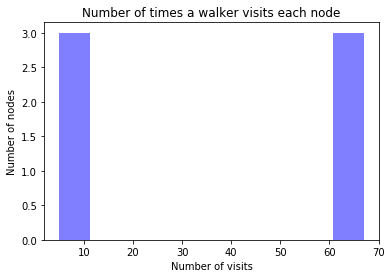

None


In [0]:
  import numpy as np
  
  def hist_nodes_visits(G):
    nodes = G.nodes()
    count = count_nodes(G)
    num_bins = 10
    plt.hist(count.values(), num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Number of visits')
    plt.ylabel('Number of nodes')
    plt.title('Number of times a walker visits each node')
    plt.show()
    
print(hist_nodes_visits(G))

In [0]:
# Random walk using networkx (doesn't work)
def random_walk(G):
  random_path = []
  all_nodes = G.nodes(edgelist)
  steady_states = list(find_steady_states(nodes))
  start = random.choice(all_nodes)
  random_path.append(start)
  #print(random_path)
  node = start
  while node not in steady_states:
    neighbors = G.neighbors(node)
    next_state = random.choice(neighbors)
    random_path.append(next_state)
    node = next_state
  return random_path
  
print(random_walk(G))

In [59]:
def count_traffic(G_a):
  nodes = G_a.nodes()
  edges = [e for e in G_a.edges()]
  #print(edges)
  list_widths = [0 for k in range(len(edges))]
  #print(list_widths)
  # Outer loop over random walks
  for i in range(2*len(nodes)):
    random_walk = individual_random_walk(G_a)
    if len(random_walk) > 1:
      rw = list(random_walk)
      random_walk = [(e[0],e[1]) for e in rw]
      #print(random_walk)
  # inner loop over edges in G
      for j in range(len(edges)): 
        if edges[j] in random_walk:
          list_widths[j] += 1
          if edges[j][0] == edges[j][1]: 
            list_widths[j] = 1           
     #print(list_widths)
  return list_widths

print(count_traffic(G_a))
  

[7, 1, 1, 11, 0, 2, 1, 3, 2, 1, 1, 3, 3, 1, 25, 0, 1, 3, 0, 1, 13, 1, 2, 1, 1, 1, 1, 2, 1, 26, 1, 17, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 22, 1]


In [131]:
def count_edges(G_a):
  nodes = G_a.nodes()
  edges = G_a.edges()
  edge_walk_list = []
  self_nodes = []
  for i in range(2*len(nodes)):
    random_walk = individual_random_walk(G_a)
    if len(random_walk) > 1:
      rw = list(random_walk)
      random_walk = [(e[0],e[1]) for e in rw] 
      count_edge = [0 for i in range(len(random_walk))]
      for j in range(len(random_walk)): 
        if random_walk[j][0] == random_walk[j][1]:
          self_nodes.append(random_walk[j][0])
        else:
          edge_walk_list.append(random_walk[j])
  return Counter(edge_walk_list)
print(count_edges(G_a))

Counter({('0011', '0001'): 26, ('0111', '0011'): 24, ('1111', '0111'): 18, ('1110', '1111'): 13, ('1100', '1110'): 8, ('1000', '1100'): 5, ('0101', '0111'): 3, ('1001', '0001'): 2, ('1101', '1111'): 2, ('0110', '0111'): 2, ('0000', '1000'): 2, ('0010', '0011'): 1, ('1011', '1001'): 1, ('0010', '0000'): 1, ('0100', '1100'): 1, ('0100', '0000'): 1, ('1011', '0011'): 1})


In [132]:
def max_count_edges(G_a):
  edges = list(G_a.edges())
  edges_count = count_edges(G_a)
  max_width = max(edges_count.values())
  #print(max_width)
  scaled_counts = {}
  for i in range(len(edges)):
    value = (edges_count[edges[i]]/ max_width) * 10
    scaled_counts[edges[i]] = value
  return scaled_counts
print(max_count_edges(G_a))

{('0000', '1000'): 0.7407407407407407, ('0000', '0000'): 0.0, ('1000', '1000'): 0.0, ('1000', '1100'): 2.5925925925925926, ('0001', '0001'): 0.0, ('0010', '1010'): 0.37037037037037035, ('0010', '0010'): 0.0, ('0010', '0000'): 0.0, ('0010', '0011'): 0.0, ('1010', '1010'): 0.0, ('1010', '1110'): 0.7407407407407407, ('1010', '1000'): 0.37037037037037035, ('1010', '1011'): 1.1111111111111112, ('0011', '0011'): 0.0, ('0011', '0001'): 10.0, ('0100', '1100'): 0.0, ('0100', '0000'): 0.37037037037037035, ('0100', '0110'): 0.0, ('0100', '0100'): 0.0, ('1100', '1100'): 0.0, ('1100', '1110'): 3.7037037037037033, ('0110', '1110'): 0.0, ('0110', '0010'): 0.37037037037037035, ('0110', '0110'): 0.0, ('0110', '0111'): 0.37037037037037035, ('0101', '0101'): 0.0, ('0101', '0001'): 0.37037037037037035, ('0101', '0111'): 0.37037037037037035, ('0111', '0111'): 0.0, ('0111', '0011'): 8.518518518518519, ('1110', '1110'): 0.0, ('1110', '1111'): 6.296296296296297, ('1001', '0001'): 0.37037037037037035, ('1001',

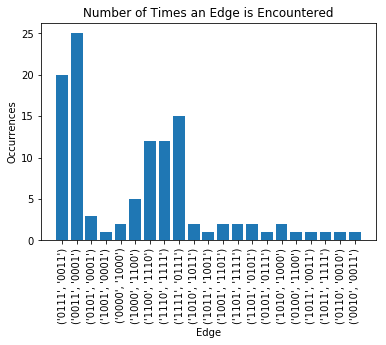

None


In [71]:
import matplotlib.pyplot as plt
def plot_count_edges(G_a):
  nodes = G_a.nodes()
  edges = G_a.edges()
  count = count_edges(G_a)
  plt.bar(range(len(count)), list(count.values()), align='center')
  plt.xticks(range(len(count)), list(count.keys()), rotation=90)
  plt.ylabel('Occurrences')
  plt.xlabel('Edge')
  plt.title('Number of Times an Edge is Encountered')
  plt.show()
  
print(plot_count_edges(G_a))
  
  

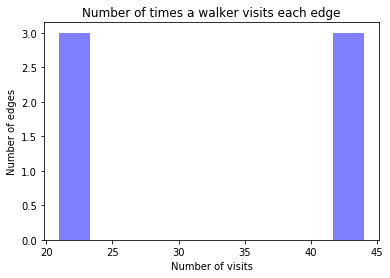

None


In [0]:
  def hist_edges_visits(G):
    edges = G.edges()
    count = count_edges(G)
    #print(count.values())
    num_bins = 10
    plt.hist(count.values(), num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Number of visits')
    plt.ylabel('Number of edges')
    plt.title('Number of times a walker visits each edge')
    plt.show()
    
print(hist_edges_visits(G))

In [34]:
def nodes_opacity(G_a):
  nodes = list(G_a.nodes())
  list_opacity = [0 for k in range(len(nodes))]
  #print(list_opacity)
  #print(len(list_opacity))
  for i in range(2*len(nodes)):
    random_walk = individual_random_walk(G_a)
    if len(random_walk) > 1:
      rw = list(random_walk)
      random_walk = [(e[0],e[1]) for e in rw]
      #print(random_walk)
      for j in range(len(nodes)):
        for e in random_walk:
          if nodes[j] in e:
            list_opacity[j] += 1
  return list_opacity

print(nodes_opacity(G_a))

[51, 61, 27, 5, 1, 105, 8, 67, 9, 7, 115, 52, 5, 13, 1, 96]


In [0]:
def node_degrees(nodes):
  in_degree = G.in_degree()
  out_degree = G.out_degree()
  print(in_degree)
  print(out_degree)
  
print(node_degrees(G))


[('0000000', 6), ('1000000', 6), ('0000001', 7), ('0000010', 5), ('1000010', 5), ('0000011', 7), ('0000100', 4), ('1000100', 4), ('0000110', 5), ('0000101', 5), ('0000111', 7), ('1000110', 5), ('0001000', 4), ('1001000', 4), ('0001100', 4), ('0001001', 5), ('0001101', 5), ('0001010', 3), ('1001010', 3), ('0001110', 5), ('0001011', 5), ('0001111', 7), ('1001100', 4), ('1001110', 5), ('0010000', 4), ('1010000', 4), ('0011000', 4), ('0010001', 5), ('0011001', 5), ('0010010', 3), ('1010010', 3), ('0011010', 3), ('0010011', 5), ('0011011', 5), ('0010100', 2), ('1010100', 2), ('0011100', 4), ('0010110', 3), ('0010101', 3), ('0011101', 5), ('0010111', 5), ('1010110', 3), ('0011110', 5), ('0011111', 7), ('1011000', 4), ('1011010', 3), ('1011100', 4), ('1011110', 5), ('0100000', 4), ('1100000', 6), ('0110000', 4), ('0100001', 5), ('0110001', 5), ('0100010', 3), ('1100010', 5), ('0110010', 3), ('0100011', 5), ('0110011', 5), ('0100100', 2), ('1100100', 4), ('0110100', 2), ('0100110', 3), ('01001